# 📊 Exploratory Data Analysis (EDA): Coffee Sales Dataset 

---

### 📚 Data Source & Objective
This project performs an exploratory analysis on a public coffee sales dataset.

* **Dataset Name:**: Cafe Sales - Dirty Data for Cleaning Training
* **Kaggle Link:** https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training
* **Key Objectives:**
 1.  **Data Cleaning and Wrangling:** Execute robust techniques to **resolve data quality issues** (e.g., handling missing numerical and categorical values, parsing inconsistent date formats, and validating transactional logic like `Total Spent = Quantity * Price Per Unit`) to achieve a reliable dataset.
2.  **Exploratory Data Analysis (EDA):** Derive meaningful conclusions from the clean data, including identifying **key sales trends** (daily/monthly performance), determining **top-selling items** by revenue and volume, and analyzing how customer behavior (based on `Location` and `Payment Method`) impacts overall cafe performance.

---

### 🛠 Dependencies
The project relies on the **Conda** virtual environment defined in the accompanying `environment.yml` file to ensure reproducibility.

## About Dataset: The Dirty Cafe Sales Dataset

### Overview

The **Dirty Cafe Sales Dataset** contains **10,000 rows** of synthetic data representing sales transactions in a cafe. This dataset is explicitly *dirty*, featuring a variety of errors, inconsistencies, and missing values to provide a realistic data wrangling and Exploratory Data Analysis (EDA) challenge.

---

### Column Challenges and Description

The dataset includes the following columns, each presenting specific challenges for cleaning:

* **Transaction ID:** A unique identifier for each transaction, which is **always present and unique** (a reliable key).
* **Item:** The name of the item purchased. Expect **missing or invalid values** (e.g., `NaN`, `"ERROR"`).
* **Quantity:** The quantity of the item purchased. Expect **missing or invalid values** such as `NaN`, `"UNKNOWN"`, or other non-numeric entries.
* **Price Per Unit:** The price of a single unit of the item. Expect **missing or invalid values**, including string representations of numbers or unreasonable outliers.
* **Total Spent:** The total amount spent on the transaction. Expect **missing values**; this column must be calculated and verified (`Quantity * Price Per Unit`) after cleaning the individual components.
* **Payment Method:** The method of payment used. Expect **missing or inconsistent categorical values** (e.g., `None`, `"UNKNOWN"`, inconsistent casing).
* **Location:** The location where the transaction occurred. Expect **missing or inconsistent categorical values**.
* **Transaction Date:** The date of the transaction. Expect **missing or incorrect date formats/values**, requiring careful date/time parsing and validation.


---


## 1. Importing the required libraries, loading the data and basic preprocesing 
---

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import warnings 

In [3]:
# Set style preferences for visualizations
sns.set_style("ticks")
sns.set_palette(sns.color_palette(palette='colorblind'))

In [4]:
# Loading the dataset and inspecting the first rows to assure it imported correctly
warnings.filterwarnings('ignore')
df = pd.read_csv("dirty_cafe_sales.csv")

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [5]:
# Check data types and dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


## Key Next Steps for Data Preparation

1.  **Data Standardization:** **Rename** all columns to a consistent format (e.g., snake\_case) to simplify coding and improve readability throughout the analysis.
2.  **Type Casting and Cleaning:** **Cast** essential columns to their correct data types, which first requires cleaning inconsistent non-numeric entries (e.g., 'ERROR', 'UNKNOWN'). Specifically, convert `Quantity`, `Price Per Unit`, and `Total Spent` to numeric types, and `Transaction Date` to a datetime object.
3.  **Missing Value Strategy:** **Systematically address missing values** across numerous columns, requiring the implementation\imputation techniques (e.g., mode/median filling) and data validation.

In [6]:
# Rename columns in snake case
new_columns = [col.lower().replace(" ", "_") for col in df.columns]
df.columns = new_columns
print(f"New column names : {df.columns.tolist()}") 

New column names : ['transaction_id', 'item', 'quantity', 'price_per_unit', 'total_spent', 'payment_method', 'location', 'transaction_date']


In [7]:
# Cleaning inconsistent entries 
for column in df.columns:
    print(f"Column {column},\n values: {df[column].unique()}")
    print("-" * 60)


Column transaction_id,
 values: ['TXN_1961373' 'TXN_4977031' 'TXN_4271903' ... 'TXN_5255387' 'TXN_7695629'
 'TXN_6170729']
------------------------------------------------------------
Column item,
 values: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
------------------------------------------------------------
Column quantity,
 values: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
------------------------------------------------------------
Column price_per_unit,
 values: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
------------------------------------------------------------
Column total_spent,
 values: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
------------------------------------------------------------
Column payment_method,
 values: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
--------------------------------------

In [8]:
# Since the errors "UNKNOWN" & "ERROR" are consistent across the columns, I will replace them all with NaN values 
df = df.replace(
    ["UNKNOWN", "ERROR"],
    np.NAN
)

# Check a column to assure the conversion was successful
print("----- After global conversion -----")
print(df['quantity'].unique())


----- After global conversion -----
['2' '4' '5' '3' '1' nan]


In [9]:
df.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,NaN,NaN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [10]:
# Type Casting columns to their correct data type 
numeric_cols = ["quantity", "price_per_unit", "total_spent"]

for col in numeric_cols:
    df[col] = df[col].astype("float")
    print(f"Column {col} data type is {df[col].dtypes}")


Column quantity data type is float64
Column price_per_unit data type is float64
Column total_spent data type is float64


In [11]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], errors="coerce")
print(df['transaction_date'].dtype)

datetime64[ns]


In [12]:
# Checking for duplicate values 
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset")


There are 0 duplicated rows in the dataset


In [13]:
# Checking for missing values
missing_values  = df.isnull().sum()
percentage_missing_values  = (missing_values / len(df)) * 100

missing_values_df = pd.DataFrame({
    "Missing_values_count" : missing_values,
    "Percentage_missing_values": percentage_missing_values
})

display(missing_values_df.sort_values(by='Percentage_missing_values', ascending=False))

,Missing_values_count,Percentage_missing_values
location,3961,39.61
payment_method,3178,31.78
item,969,9.69
price_per_unit,533,5.33
total_spent,502,5.02
quantity,479,4.79
transaction_date,460,4.60
transaction_id,0,0.00


In [14]:
""" 
The columns 'location' and 'payment_method' have a significant percentage of missing values and
the best strategy is to treat them as separate category 
"""

df['location'] = df['location'].replace(np.nan, "Unknown_location")
df['payment_method'] = df['payment_method'].replace(np.nan, "Unknown_payment_method")


### **Handling Interconnected Missing Values**

The columns **'item'**, **'price\_per\_unit'**, **'quantity'**, and **'total\_spent'** are interconected, resulting in various percentages of missing data.

Our strategy for imputing these values is based on **business logic** ($\text{Total Spent} = \text{Quantity} \times \text{Price Per Unit}$) rather than simple statistical imputation. The algorithm will systematically verify the available entries across these four columns to **calculate** the missing value, ensuring maximum data integrity and accuracy.


### 1. Column "price_per_unit"

In [15]:
# MASK 1: Check for rows where price_per_unit can be calculated (total_spent & quantity are known)
total_price_mask = df['price_per_unit'].isnull() & df['total_spent'].notna() & df['quantity'].notna()
print(total_price_mask.sum())

# MASK 2: Check for rows where price_per_unit can be matched with the item (Item is known, but total_spent & quantity are missing) 
item_mask = df['price_per_unit'].isnull() & df['item'].notna() & df['total_spent'].isnull() & df['quantity'].isnull()
print(item_mask.sum())

495
0


In [16]:
# Smart imputation: Calculate price_per_unit from total_spent / quantity
price_per_unit_fill_values = df.loc[total_price_mask, 'total_spent'] / df.loc[total_price_mask, 'quantity']

# Apply the calculated values to the rows where price_per_unit is missing
df.loc[total_price_mask, 'price_per_unit'] = price_per_unit_fill_values

print(f'After the imputation {df['price_per_unit'].isnull().sum()} NaN values remain in "price_per_unit" column')

# Final imputation: Fill the remaining NaN values with the global median of the column
df['price_per_unit'] = df['price_per_unit'].fillna(df['price_per_unit'].median())

if df['price_per_unit'].isna().sum() == 0:
    print("\nAll the NaN values were successfuly imputed!")

After the imputation 38 NaN values remain in "price_per_unit" column

All the NaN values were successfuly imputed!


### 2. Column 'total_spent'

In [17]:
# MASK : Check for rows where total_spent can be calculated (price_per_unit & quantity are known)
price_quantity_mask = df['total_spent'].isnull() & df['price_per_unit'].notna() & df['quantity'].notna()
print(price_quantity_mask.sum())


482


In [18]:
# Smart imputation: Calculate total_spent from price_per_unit * quantity
total_spent_fill_values = df.loc[price_quantity_mask , 'price_per_unit'] * df.loc[price_quantity_mask, 'quantity']

# Apply the calculated values to the rows where total_spent is missing
df.loc[price_quantity_mask , 'total_spent'] = total_spent_fill_values

print(f'After the imputation {df['total_spent'].isnull().sum()} NaN values remain in "total_spent" column')

# Final imputation: Fill the remaining NaN values with the global median of the column
df['total_spent'] = df['total_spent'].fillna(df['total_spent'].median())

if df['total_spent'].isna().sum() == 0:
    print("\nAll the NaN values were successfuly imputed!")

After the imputation 20 NaN values remain in "total_spent" column

All the NaN values were successfuly imputed!


### 3. Column 'quantity' 

In [19]:
# MASK : Check for rows where quantity can be calculated (price_per_unit & total_spent are known)
price_total_spent_mask = df['quantity'].isnull() & df['price_per_unit'].notna() & df['total_spent'].notna()
print(price_total_spent_mask.sum())

479


In [20]:
# Smart imputation: Calculate quantity from total_spent / price_per_unit 
quantity_fill_values = df.loc[price_total_spent_mask , 'total_spent'] /  df.loc[price_total_spent_mask, 'price_per_unit']

# Apply the calculated values to the rows where total_spent is missing
df.loc[price_total_spent_mask , 'quantity'] = quantity_fill_values

if df['quantity'].isna().sum() == 0:
    print("\nAll the NaN values were successfuly imputed!")


All the NaN values were successfuly imputed!


### 4. Column 'item'

In [21]:
# 1. Create the price_per_unit -> Item map.
# We group by the clean 'price_per_unit' and find the mode for that price.
price_to_item = df.dropna(subset=['item', 'price_per_unit']).groupby('price_per_unit')['item'].agg(pd.Series.mode).to_dict()

# 2. Apply the conditional mapping.
# For rows where 'item' is NaN, replace it with the mapped value from 'price_per_unit'.
df.loc[df['item'].isnull(), 'item'] = \
    df.loc[df['item'].isnull(), 'price_per_unit'].map(price_to_item)

if df['item'].isna().sum() == 0:
    print("\nAll the NaN values were successfuly imputed!")


All the NaN values were successfuly imputed!


In [22]:
# Forward fill the transaction_date column 
df['transaction_date'] = df['transaction_date'].fillna(method='ffill')

# Backward fill any remaining missing dates in the transaction_date column
df['transaction_date'] = df['transaction_date'].fillna(method='bfill')

# Check for any remaining missing values
df.isnull().sum()

transaction_id      0
item                0
quantity            0
price_per_unit      0
total_spent         0
payment_method      0
location            0
transaction_date    0
dtype: int64

### **Data Cleanup Complete! Time for Feature Engineering**

All `NaN`s in our dataset are taken care of:
1.  We used business logic to fix the interconnected transaction columns.
2.  We labeled the categories with high percentages of missing data (`location`, `payment_method`).
3.  We also successfully imputed the `transaction_date` column.

Now, we're ready for **Feature Engineering**. We're going to take the single transaction date and break it down into useful components (Year, Month, Day). This makes the temporal information ready for proper analysis and helps us see how sales trend over time!

In [23]:
df['transaction_date']

0      2023-09-08
1      2023-05-16
2      2023-07-19
3      2023-04-27
4      2023-06-11
          ...    
9995   2023-08-30
9996   2023-06-02
9997   2023-03-02
9998   2023-12-02
9999   2023-11-07
Name: transaction_date, Length: 10000, dtype: datetime64[ns]

In [24]:
# Split the transaction_date in four columns 
df['transaction_year'] = df['transaction_date'].dt.year

df['transaction_month'] = df['transaction_date'].dt.month

df['transaction_day'] = df['transaction_date'].dt.day

df['transaction_weekday'] = df['transaction_date'].dt.day_name()

In [25]:
# Drop the transaction_date column 
df = df.drop('transaction_date', axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  object 
 1   item                 10000 non-null  object 
 2   quantity             10000 non-null  float64
 3   price_per_unit       10000 non-null  float64
 4   total_spent          10000 non-null  float64
 5   payment_method       10000 non-null  object 
 6   location             10000 non-null  object 
 7   transaction_year     10000 non-null  int32  
 8   transaction_month    10000 non-null  int32  
 9   transaction_day      10000 non-null  int32  
 10  transaction_weekday  10000 non-null  object 
dtypes: float64(3), int32(3), object(5)
memory usage: 742.3+ KB


## **Start EDA: Univariate Analysis**

Now that the data cleaning and feature engineering phases are complete, we will begin the Exploratory Data Analysis process.

We start with **Univariate Analysis** to understand the distribution, central tendency, and unique characteristics of each column in isolation.

Our focus will be:
1.  **Categorical Columns (Frequencies):** Visualizing counts to identify the top categories and usage patterns.
2.  **Numerical Columns (Distributions):** Checking the spread, mean, median, and presence of outliers using histograms and descriptive statistics.

In [26]:
# Isolate the numerical and categorical columns foe easier manipulation
numerical_cols = df.select_dtypes(include=['number'])
cat_cols = df.select_dtypes(include=['object'])
cat_cols = [col for col in cat_cols if not col == "transaction_id"]

,quantity,price_per_unit,total_spent,transaction_year,transaction_month,transaction_day
count,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000
mean,3.025870,2.948100,8.928900,2023.0,6.525900,15.743900
std,1.423499,1.277329,5.995072,0.0,3.452089,8.765968
min,0.333333,1.000000,1.000000,2023.0,1.000000,1.000000
25%,2.000000,2.000000,4.000000,2023.0,4.000000,8.000000
50%,3.000000,3.000000,8.000000,2023.0,7.000000,16.000000
75%,4.000000,4.000000,12.000000,2023.0,10.000000,23.000000
max,8.333333,5.000000,25.000000,2023.0,12.000000,31.000000


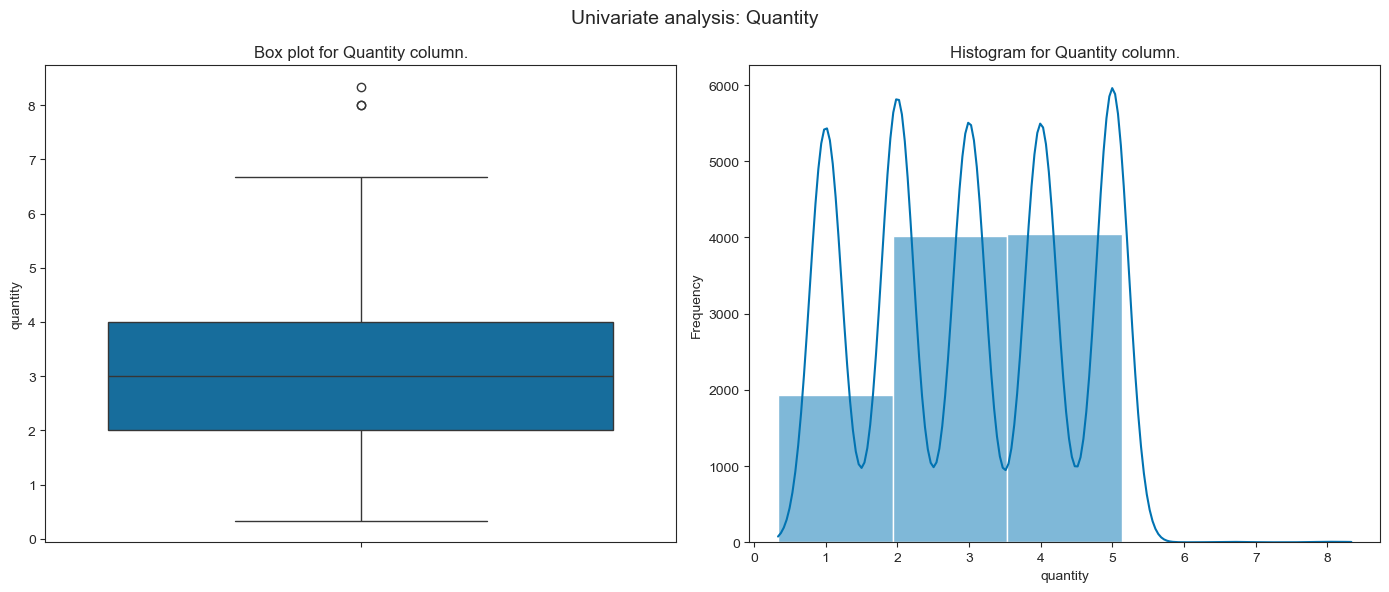

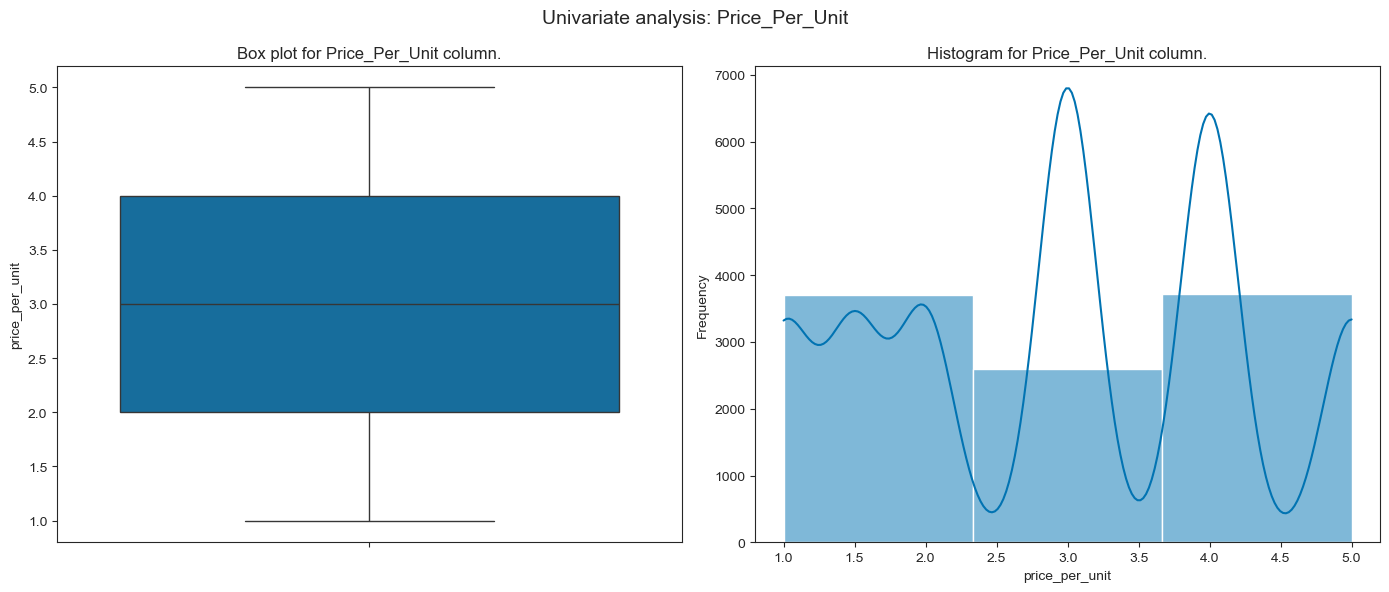

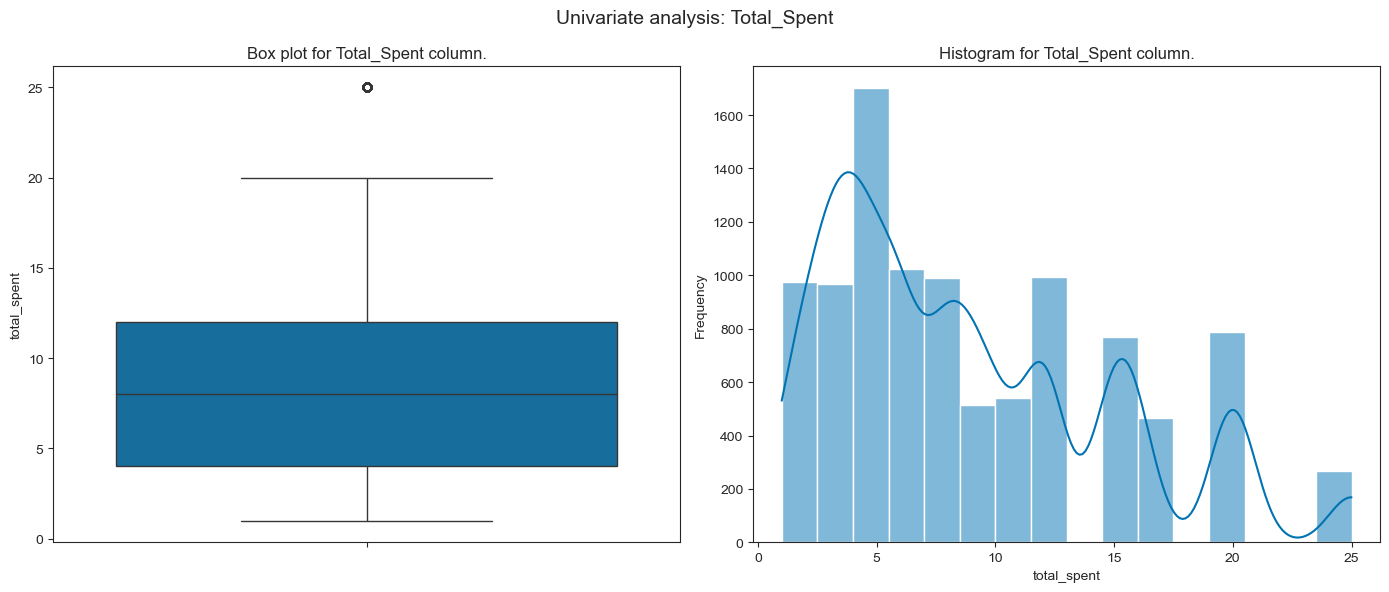

In [27]:
# Statistical summary for numerical columns 
display(df.describe())

# Next, we generate histograms and boxplots for each numerical column 
for col in numeric_cols:

    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

    # Box plot 
    sns.boxplot(y=df[col], ax=axes[0])
    axes[0].set_title(f"Box plot for {col.title()} column.")
    

    # Histogram 
    sns.histplot(df[col], kde=True, ax=axes[1], binwidth=1.5)
    axes[1].set_title(f"Histogram for {col.title()} column.")
    axes[1].set_ylabel("Frequency")

    plt.suptitle(f"Univariate analysis: {col.title()}", fontsize=14)
    plt.tight_layout()
    plt.show()

## Univariate Analysis Insights

### Total_Spent
- **Right-skewed**: Most purchases <$10, few high-value transactions up to ~$25
- **High frequency** of low-spend transactions
- **Outliers present** in upper spending ranges

### Price_Per_Unit
- **Aproximate normal** distribution
- **Peak frequency** between $2.50-$3.50
- **Range**: $1.00 to $5.00

### Quantity
- **Extremely right-skewed**: Majority are single-unit purchases
- **Rapid drop-off** in frequency for quantities >1
- **Bulk purchases are rare**

### Summary
- Retail-focused with small, individual purchases dominating
- Moderate pricing ($2.50-$3.50) most common
- Revenue driven by volume of small transactions plus high-value outliers

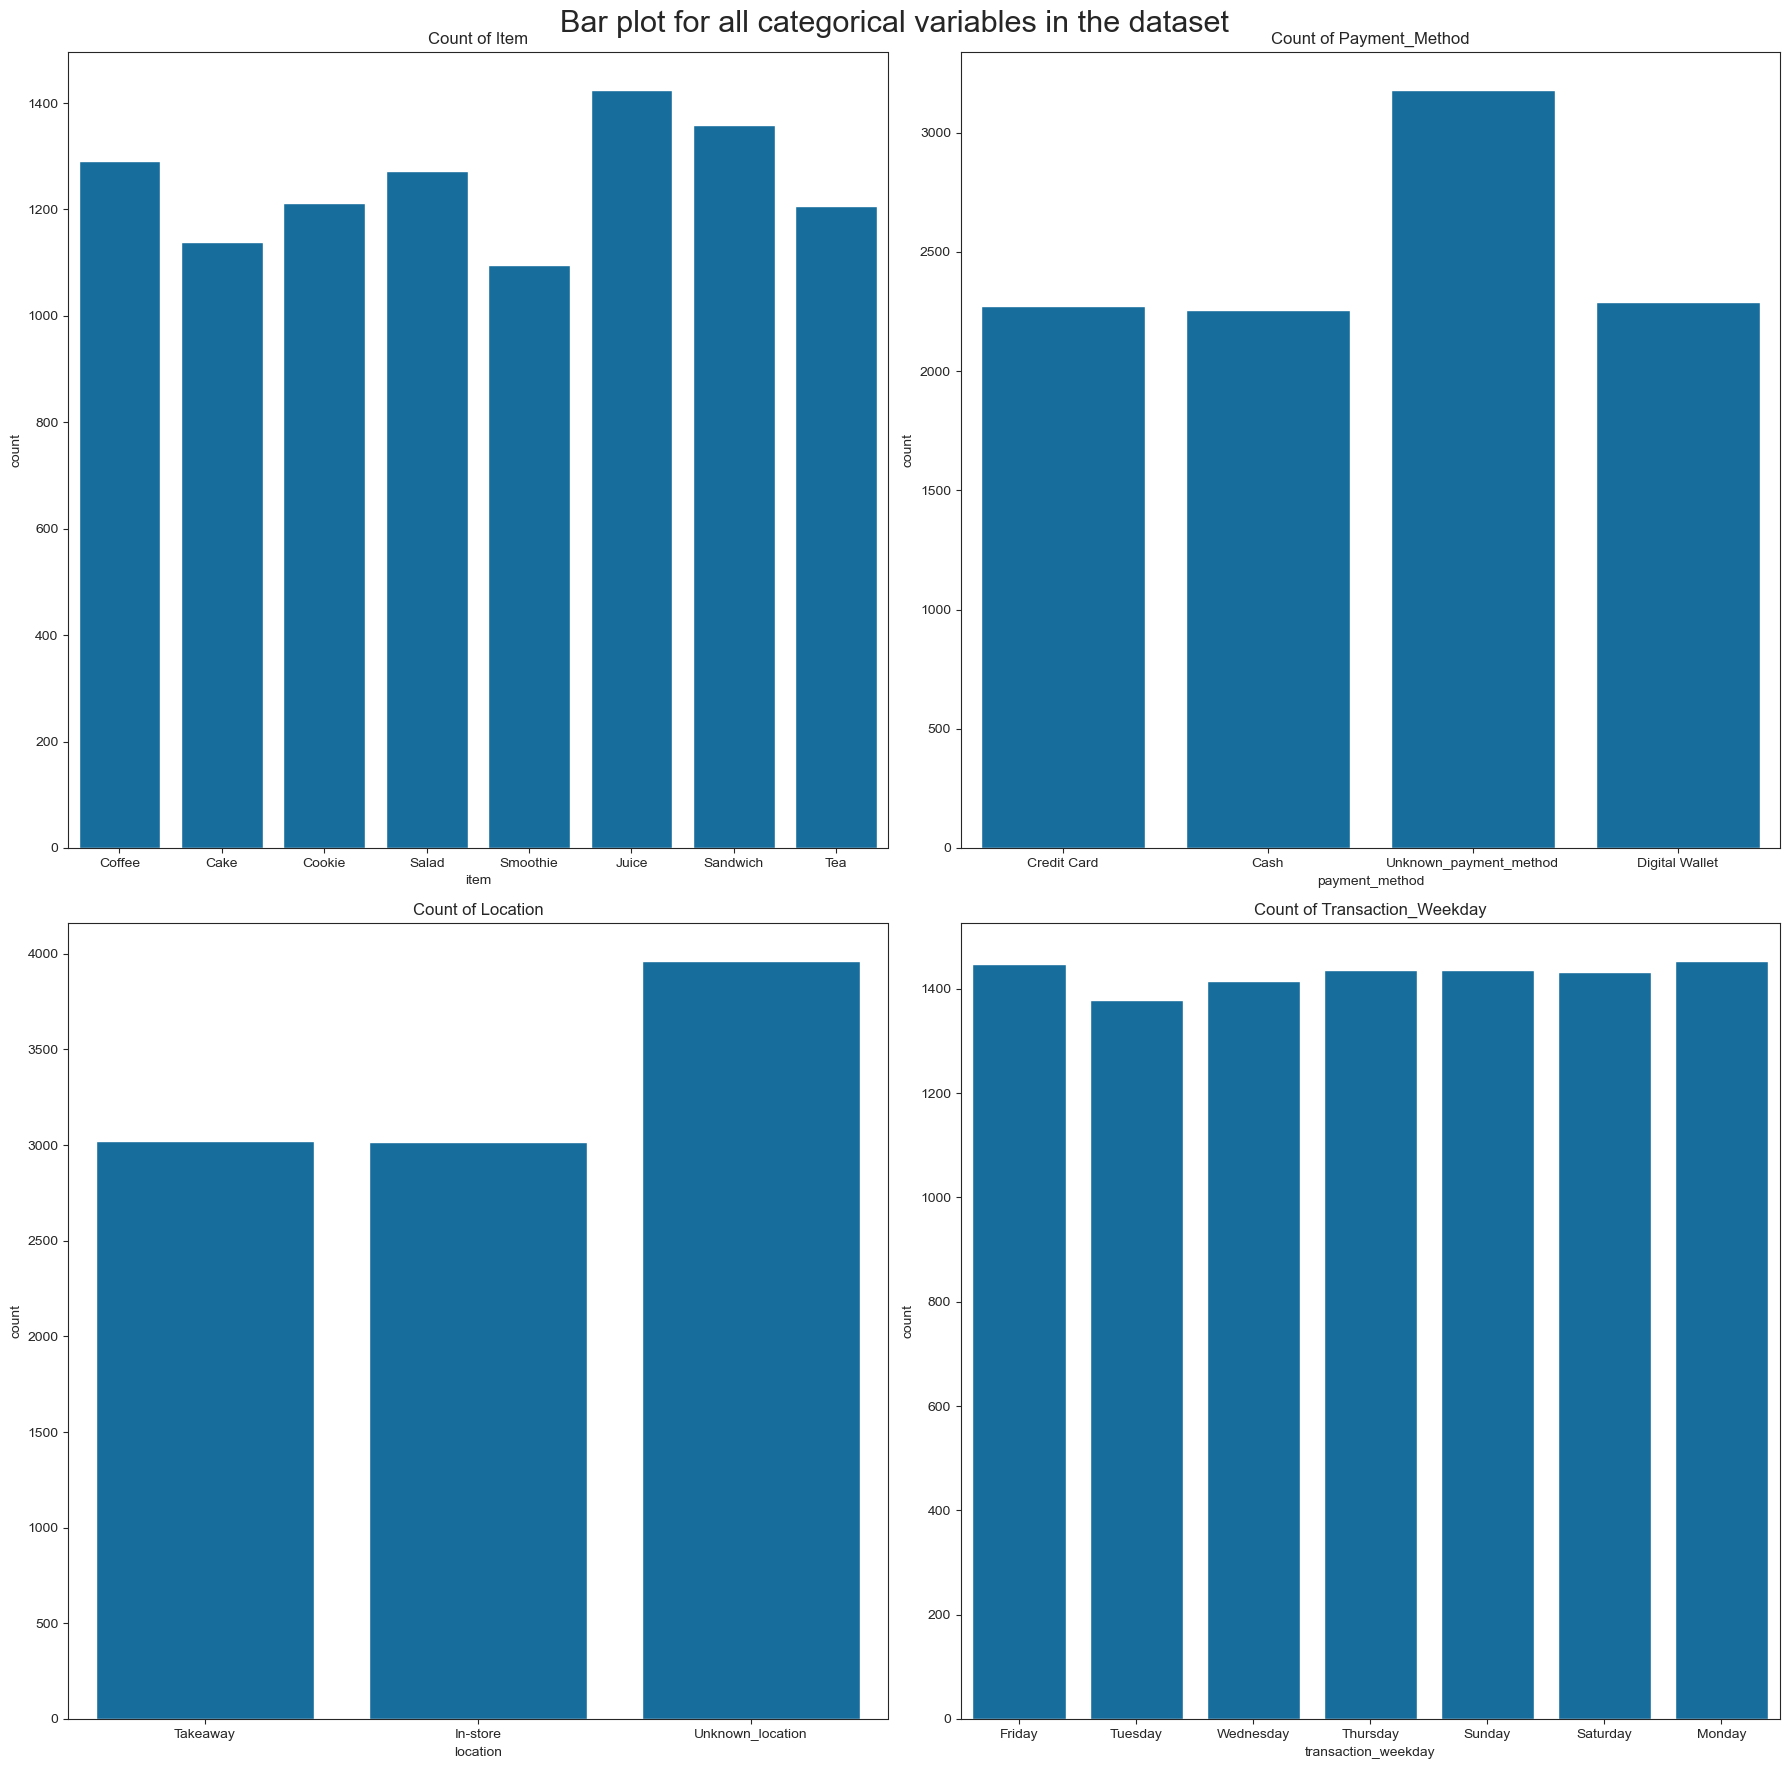

In [28]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset', fontsize=22)

axes = axes.flatten()
for col, ax in zip(cat_cols, axes):
        sns.countplot(x=df[col], ax=ax)
        ax.set_title(f"Count of {col.title()}") 
plt.tight_layout()
plt.show()      

## 📊 Key Insights – Categorical Columns

1. Product Preferences
*Juice* is the top-selling product, followed by *sandwiches* and *coffee*. These categories represent the core of daily transactions and should remain central to menu planning and marketing efforts.

2. Payment Methods
The majority of customers prefer *digital* or *non-cash payments*, indicating a modern and convenience-oriented consumer base.
Note: A significant portion of payment data is missing, which may affect the accuracy of this conclusion.

3. Order Type
The available data suggests an even split between *takeaway* and *in-store* orders, showing balanced customer behavior between convenience and on-premise consumption.

4. Temporal Patterns
Operations appear consistent across the week, with a noticeable sales peak on *Mondays* — potentially linked to weekly routine purchases or commuting patterns.

# BIVARIATE ANALYSIS 
* Is there a difference in customers preferences based on the day of the week?
* Do customers spend more on the weekends or during work days?
* Is any pattern regarding payment methods during the week?
* The sales MoM have a specific tendency?
* Witch items bring the most revenue and during what time of the week?


In [29]:
# Correct order of the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the column to an ordered categorical type
df['transaction_weekday'] = pd.Categorical(
    df['transaction_weekday'],
    categories=days_order,
    ordered=True
)

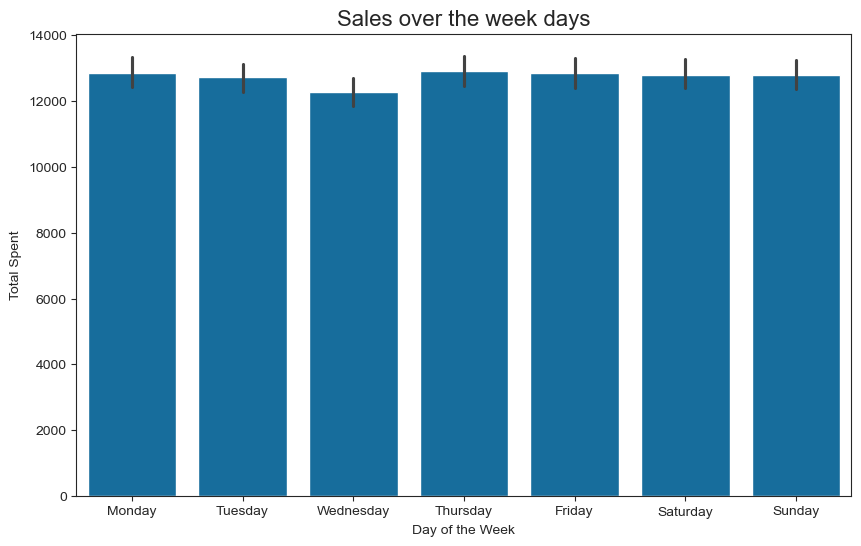

In [30]:
plt.figure(figsize=(10, 6))
plt.title("Sales over the week days", fontsize=16)
sns.barplot(
    x='transaction_weekday', y='total_spent', data=df, estimator="sum"
    )
plt.xlabel("Day of the Week")
plt.ylabel("Total Spent")

plt.show()

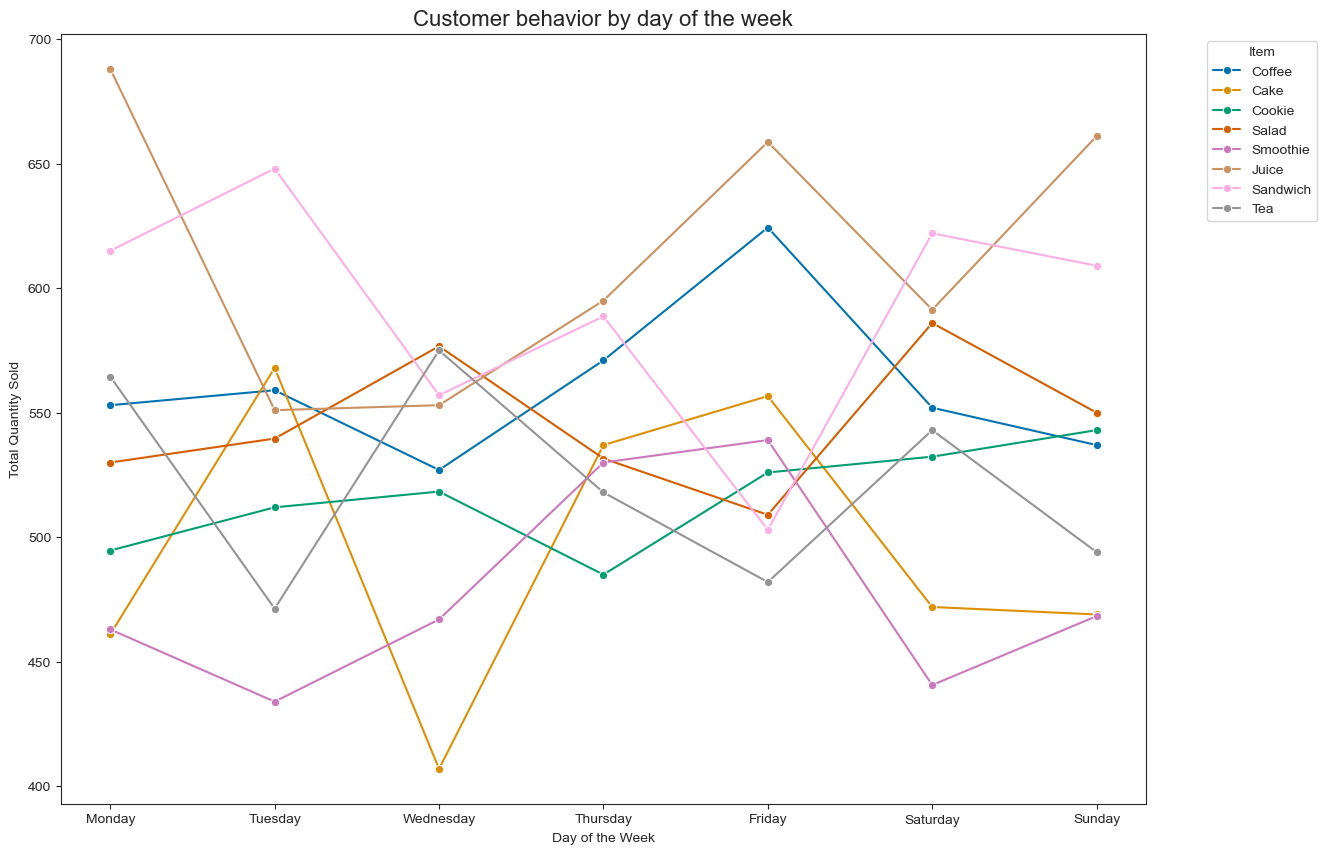

In [31]:
plt.figure(figsize=(14, 10))
plt.title("Customer behavior by day of the week", fontsize=16)
sns.lineplot(
    x='transaction_weekday', y='quantity', data=df, hue='item', estimator="sum", errorbar=None, marker="o"
    )
plt.xlabel("Day of the Week")
plt.ylabel("Total Quantity Sold")
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')


# Start with Monday
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

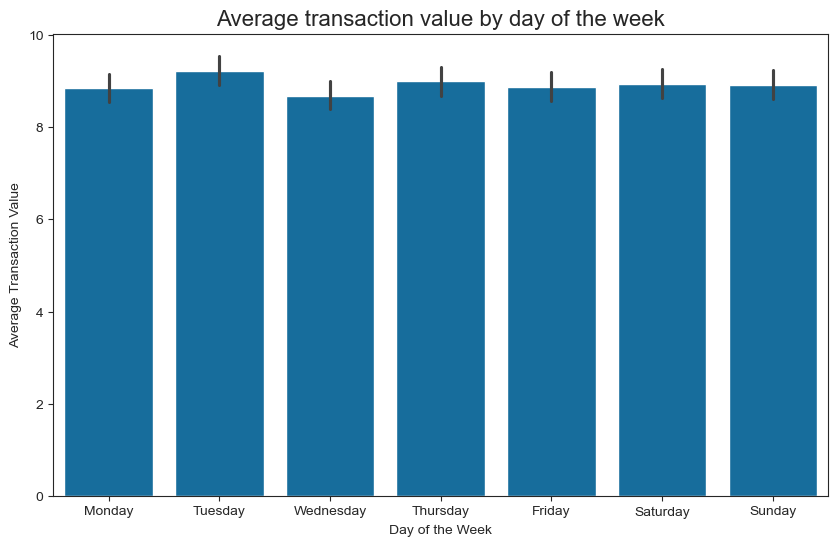

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Average transaction value by day of the week", fontsize=16)
sns.barplot(
    x='transaction_weekday', y='total_spent', data=df, estimator="mean"
    )

plt.xlabel("Day of the Week")
plt.ylabel("Average Transaction Value")

plt.show()

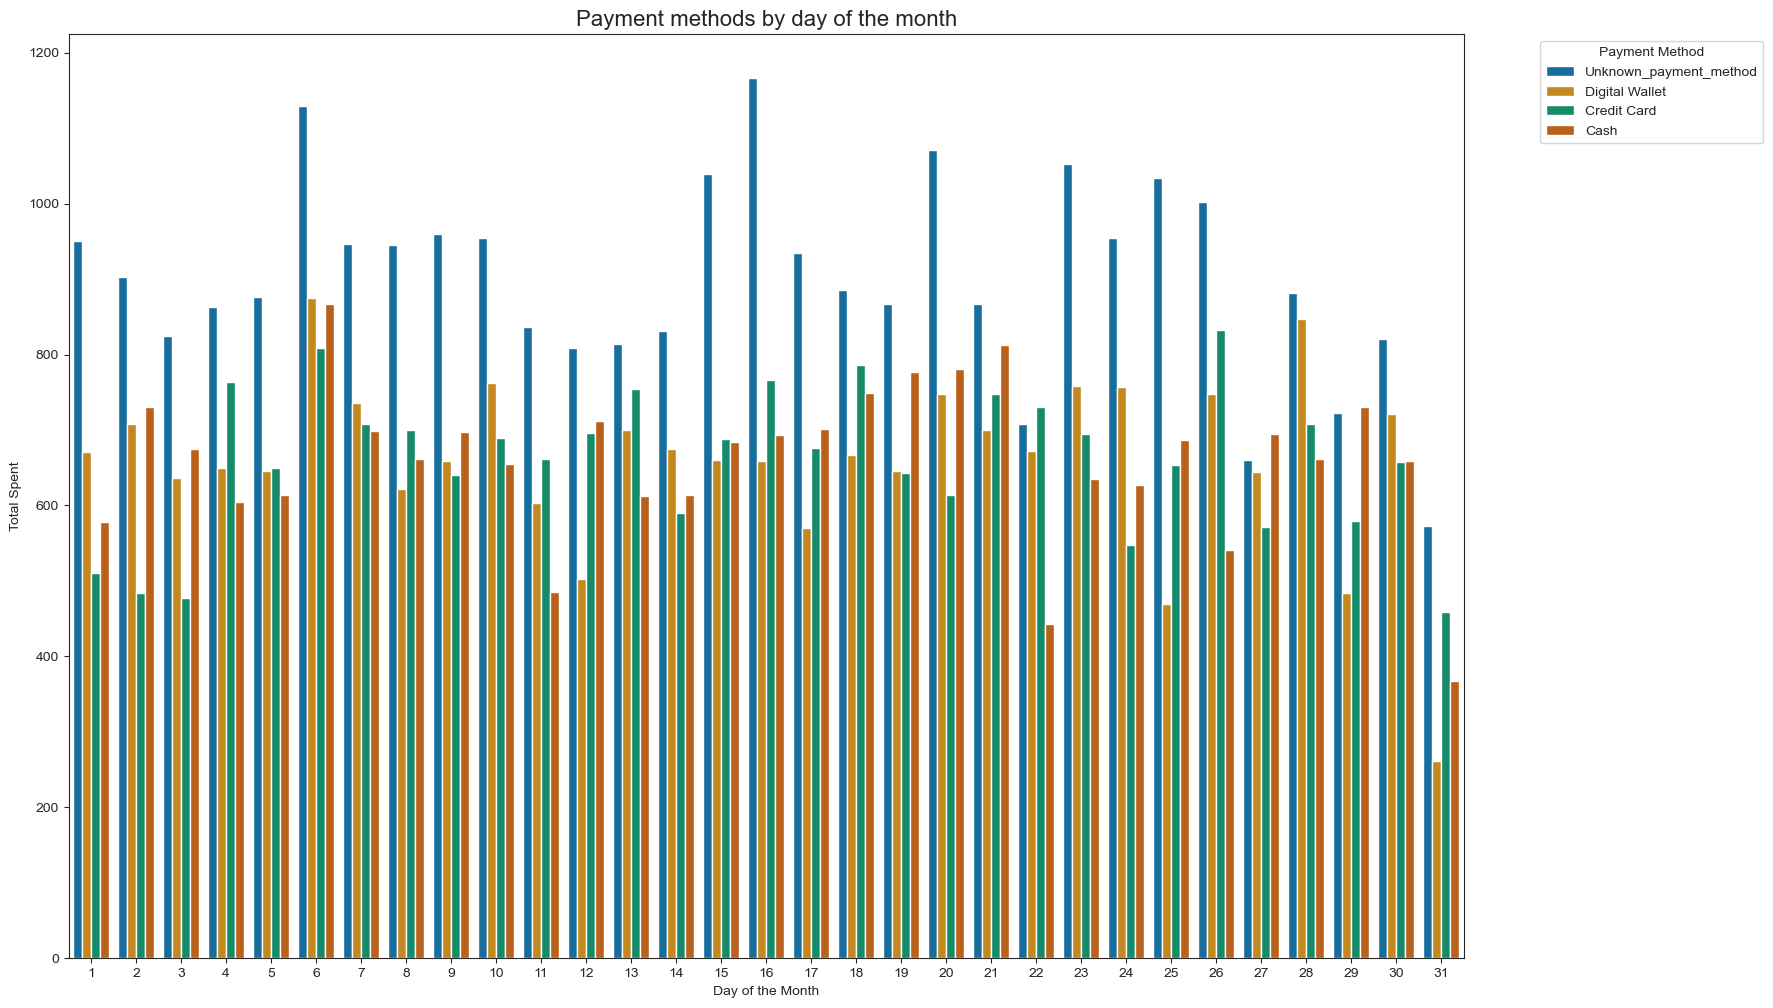

In [33]:
plt.figure(figsize=(18, 12))
plt.title("Payment methods by day of the month", fontsize=16)
sns.barplot(
    x='transaction_day', y='total_spent', data=df, hue='payment_method', estimator="sum", errorbar=None
    )
plt.xlabel("Day of the Month")
plt.ylabel("Total Spent")
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

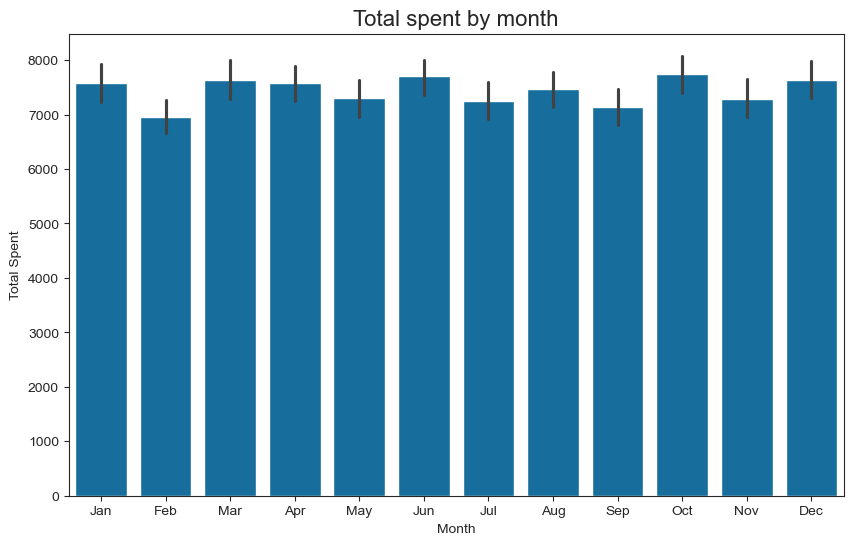

In [34]:
plt.figure(figsize=(10, 6))

plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title("Total spent by month", fontsize=16)
sns.barplot(
    x='transaction_month', y='total_spent', data=df.sort_values(by='transaction_month'), estimator="sum"
    )
plt.xlabel("Month")
plt.ylabel("Total Spent")

plt.show()

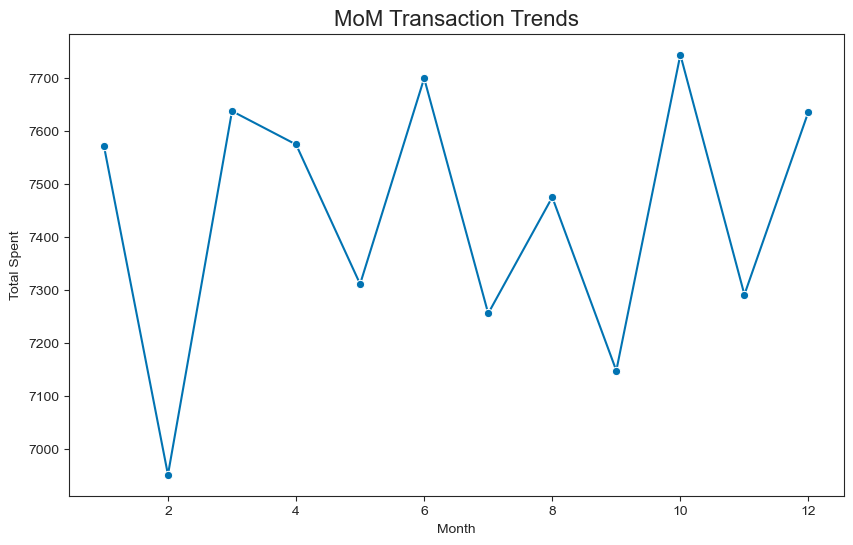

In [35]:
plt.figure(figsize=(10, 6))
plt.title("MoM Transaction Trends", fontsize=16)
sns.lineplot(
    x='transaction_month', y='total_spent', data=df.sort_values(by='transaction_month'), estimator="sum", marker="o", errorbar=None
    )

plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.show()

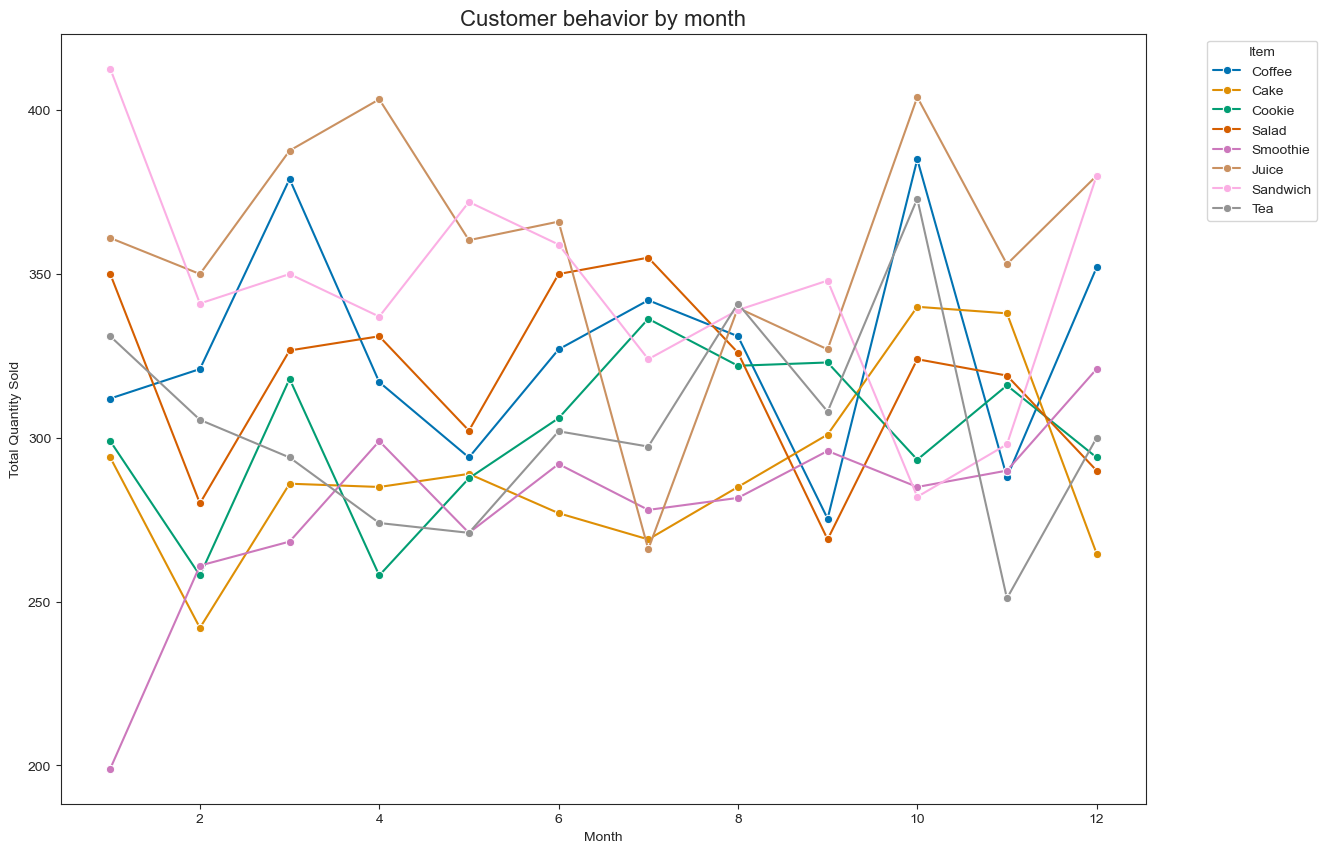

In [36]:
plt.figure(figsize=(14, 10))
plt.title("Customer behavior by month", fontsize=16)
sns.lineplot(
    x='transaction_month', y='quantity', data=df, hue='item', estimator="sum", errorbar=None, marker="o"
    )
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


# Insights

- Time series analysis shows no significant differences in purchase preferences across weekdays, although *Wednesday* generates the lowest revenue, followed by a slight peak on *Thursday*.  
- *Juice* is the top-selling item throughout the week, followed by *sandwiches* and *cakes*. *Coffee* also maintains strong and steady sales across all days with a peak on *Friday*, indicating consistent demand. Overall, sales patterns are stable with no major weekday fluctuations, while *smoothies* remain the least popular items.  
- The highest average spend per customer is on *Tuesday*, and the lowest is on *Wednesday*.  
- Spending is fairly balanced across most days, but noticeable peaks occur around the 6th, 17th, and 21st of the month. The final days of the month show a significant drop across all payment methods—especially *Digital Wallet* and *Credit Card*—suggesting higher mid-month activity and reduced spending toward month-end.  
- Regarding *total monthly spend*, there is slight variation throughout the year, with peaks in *January*, *June*, and *October*, and the lowest sales in *February*.
- *Juice* remains the top-selling item throughout the year, showing strong and consistent demand. *Sandwiches* also perform well, with peaks in early and late months.*Salad* is prefered at the beggining of the year, suggesting the impact of 'NY Rezolution', and in the summer months. *Cookies* and *Tea* show higher volatility, indicating seasonal or promotional influences. 
Overall, sales volumes across products are relatively balanced, without extreme fluctuations but clearly impacted by season.

# Product performance 

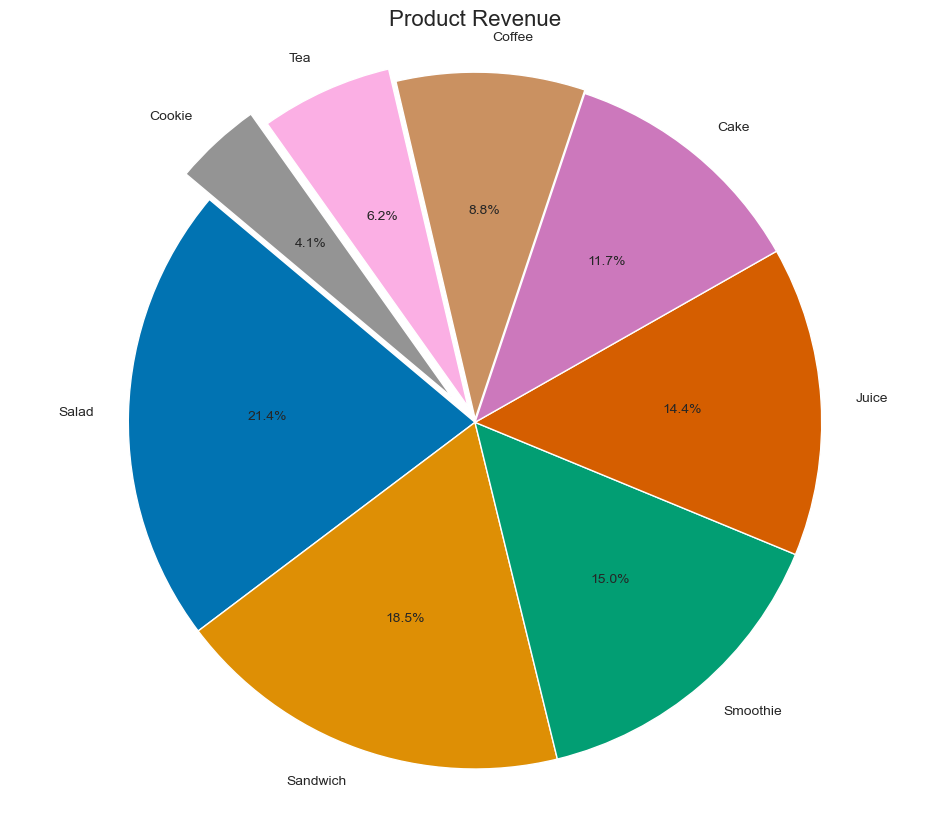

In [78]:
plt.figure(figsize=(12, 10))
plt.title("Product Revenue", fontsize=16)

df_item_revenue = df.groupby('item')['total_spent'].sum().reset_index().sort_values(by='total_spent', ascending=False)
plt.pie(
    df_item_revenue['total_spent'], labels=df_item_revenue['item'], autopct='%1.1f%%', startangle=140,
    explode=[0, 0, 0, 0, 0, 0.010, 0.05, 0.1]
    )
plt.axis('equal')

plt.show()

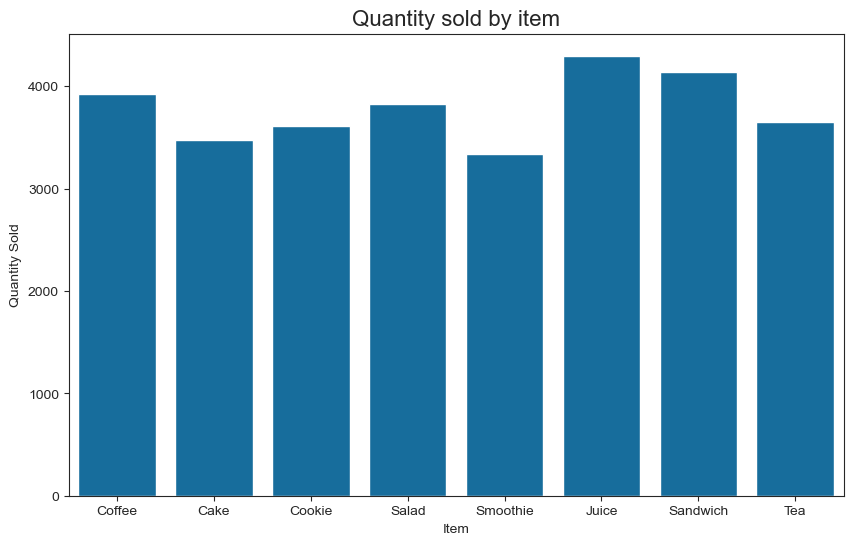

In [38]:
plt.figure(figsize=(10, 6))
plt.title("Quantity sold by item", fontsize=16)
sns.barplot(
    x='item', y='quantity', data=df, estimator="sum", errorbar=None
    )

plt.xlabel("Item")
plt.ylabel("Quantity Sold")
plt.show()

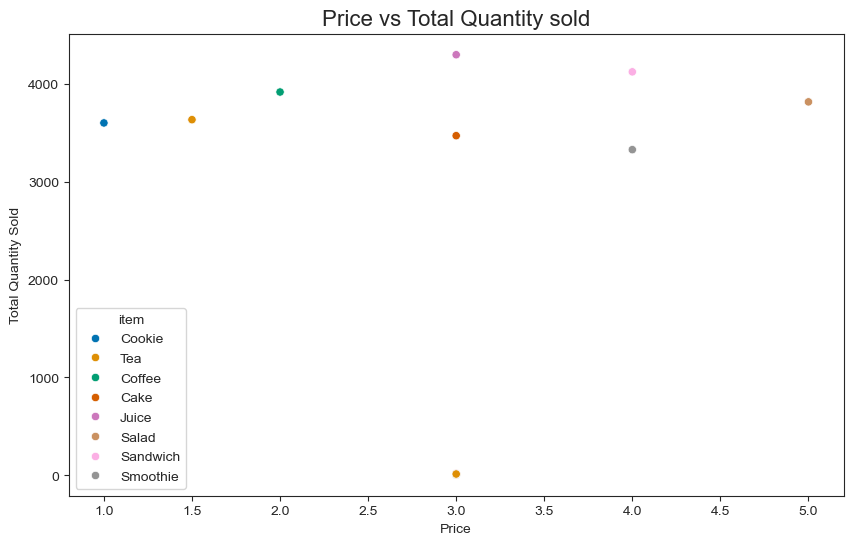

In [39]:
plt.figure(figsize=(10, 6))
plt.title("Price vs Total Quantity sold", fontsize=16)

df_scatter = df.groupby(['price_per_unit', 'item'], as_index=False).agg(
    total_quantity=('quantity', 'sum')
)

sns.scatterplot(
    x='price_per_unit', y='total_quantity', data=df_scatter, hue='item'
)
plt.xlabel("Price")
plt.ylabel("Total Quantity Sold")
plt.show()


# Remarks 
- *Salads* generate the highest revenue, being one of the best selling items even tho is the most expensive one. *Cookies* contribute the least in terms of revenue because it has the lowest price. However, in terms of quantity sold, *juice* is the best-selling item followed by *sandwiches*.


In [40]:
df.head()

,transaction_id,item,quantity,price_per_unit,total_spent,payment_method,location,transaction_year,transaction_month,transaction_day,transaction_weekday
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023,9,8,Friday
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023,5,16,Tuesday
2,TXN_4271903,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023,7,19,Wednesday
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown_payment_method,Unknown_location,2023,4,27,Thursday
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023,6,11,Sunday


Text(0, 0.5, 'Total Spent')

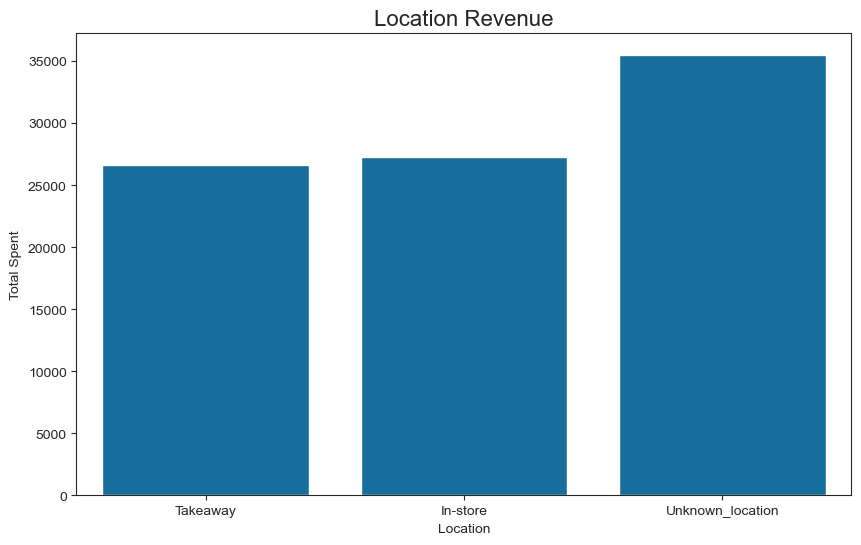

In [41]:
plt.figure(figsize=(10, 6))
plt.title("Location Revenue", fontsize=16)
sns.barplot(
    x='location', y='total_spent', data=df, estimator="sum", errorbar=None
    )   
plt.xlabel("Location")
plt.ylabel("Total Spent")   

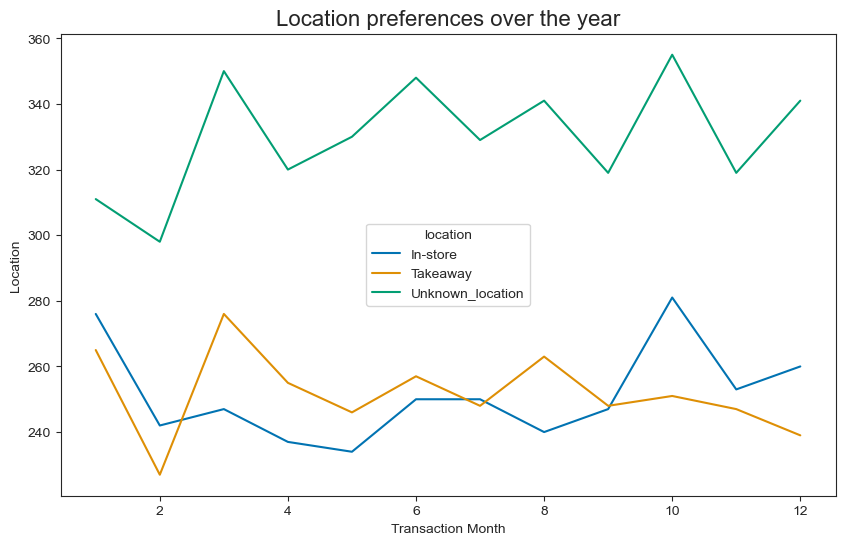

In [42]:
plt.figure(figsize=(10, 6))
plt.title("Location preferences over the year", fontsize=16)

# Track number of transactions per month per location
df_line = df.groupby(['transaction_month', 'location'], as_index=False).agg(
    transaction=('transaction_id', 'count')
)
sns.lineplot(
    x='transaction_month', y='transaction', data=df_line, estimator="count", errorbar=None, hue='location'
    
)

plt.xlabel("Transaction Month")
plt.ylabel("Location")
plt.show()

# Remarks regarding location preferences
`!Due to a large percentage of missing data, the insights might not be accurate`
- *Takeaway* is consistently the preferred method over the year, except the end months, when we see a spike in *in location* preference.
- Seasonality may be a part of the change in preference, where in the warmer time of the year *takeout* seems to be the preferred option.
- Overall, there is not a big difference in terms of the revenue produced by both *in location* abd *takeout*.


# Correlation

<Axes: >

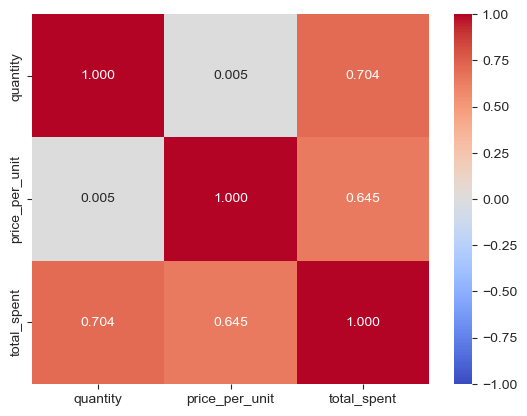

In [58]:
corr_df = df.select_dtypes(include='float').corr(method='pearson')

sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmax=1, vmin=-1, fmt=".3f")

<Figure size 1000x600 with 0 Axes>

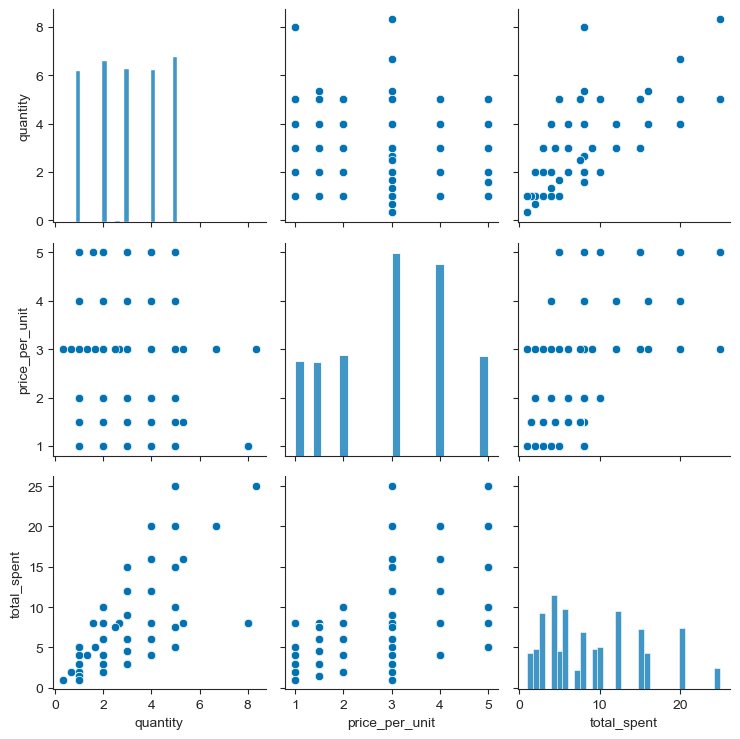

In [67]:
plt.figure(figsize=(10, 6))
sns.pairplot(df.select_dtypes(include='float'))
plt.tight_layout()
plt.show()

## Correlation matrix intepretation:
-----------------------------------------------------------

- *Quantity* sold VS *Total spent*: 0.704 (Strong positive correlation)
- *Price Per Unit* vs *Total Spent*: 0.645 (Moderate to strong positive correlation)
- *Quantity* vs *Price Per Unit*: 0.005 (Very weak correlation)
-------------------------------------------------------------

* Higher quantities lead to higher total spending
* Higher priced items contribute to higher total spending 
* Quantity bought is not much influenced by the priced